# Project 7 - Logistic Regression and Support Vector Machines

## Notebook imports and settings

In [1]:
# Python imports

# Numerical imports
import numpy as np
import pandas as pd

# SkLearn imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit


# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting settings
sns.set()
sns.set_palette("colorblind")
sns.set_style("ticks")


## Load and format data

In [5]:
bank_notes = pd.read_csv("data_banknote_authentication.txt", sep=",", header = None, names = ['variance', 'skewness', 'curtosis', 'entropy', 'class' ])

#bank_notes.head(2)

# Shuffling the data set
bank_notes = bank_notes.sample(frac = 1)


#display(bank_notes.head(5))

# Split into test / train when not using SSS
split = int(0.8 * len(bank_notes))
bank_notes_train = bank_notes[:split]
bank_notes_test = bank_notes[split:]

# # Threshold for 1 = good, 0 = bad; threshold value chosen for 50/50 dataset split
# red_wine[red_wine["quality"] < 6] = 0
# red_wine[red_wine["quality"] >= 6] = 1

# white_wine[white_wine["quality"] < 5] = 0
# white_wine[white_wine["quality"] >= 5] = 1

# combined_wine = pd.concat([red_wine, white_wine])

# print("____WHITE WINE____")
# display(white_wine.tail(3))

# print("____RED WINE____")
# display(red_wine.tail(3))

# print("____BOTH WINES____")
# display(combined_wine.tail(3))

## Logistic Regression

In [6]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

y = bank_notes_train[["class"]]
X = bank_notes_train.drop("class", axis=1)

precision, recall, f1 = 0., 0, 0.

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.flatten()
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.flatten()
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.coef_)
    
    
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred)
    precision += f
    recall += r
    f1 += f
    
precision /= 5
recall /= 5
f1 /= 5

print(f"Precision of good bills:  {precision[0]:.4f}")
print(f"Precision of bad bills: {precision[1]:.4f}")
print()

print(f"Recall of good bills:     {recall[0]:.4f}")
print(f"Recall of bad bills:    {recall[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1[0]:.4f}")
print(f"F1 Score of bad bills:  {f1[1]:.4f}")
print()

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[-2.60762128 -1.46890035 -1.75424945 -0.08173558]]
[[-2.85616803 -1.54479213 -1.90946706 -0.05373704]]
[[-2.65481447 -1.49725388 -1.79747998 -0.0935879 ]]
[[-2.63136891 -1.51861252 -1.80327197 -0.22397669]]
[[-2.71033803 -1.48234793 -1.79954196 -0.05495087]]
Precision of good bills:  0.9874
Precision of bad bills: 0.9851

Recall of good bills:     0.9800
Recall of bad bills:    0.9940

F1 Score of good bills:   0.9874
F1 Score of bad bills:  0.9851



D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Support Vector Machine (SVM)

In [35]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

y = bank_notes_train[["class"]]
X = bank_notes_train.drop("class", axis=1)

precision_linear, recall_linear, f1_linear = 0., 0, 0.
precision_rbf, recall_rbf, f1_rbf = 0., 0, 0.
precision_poly, recall_poly, f1_poly = 0., 0, 0.

fignum = 1
for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.flatten()
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.flatten()
    
    clf_linear = SVC(kernel = 'linear', random_state=0, gamma = 'auto',class_weight="balanced").fit(X_train, y_train)
    clf_rbf = SVC(kernel = 'rbf', random_state=0, gamma = .01,class_weight="balanced").fit(X_train, y_train)
    clf_poly = SVC(kernel = 'poly', random_state=0, degree = 4,class_weight="balanced").fit(X_train, y_train)

    y_pred_linear = clf_linear.predict(X_test)
    y_pred_rbf = clf_rbf.predict(X_test)
    y_pred_poly = clf_poly.predict(X_test)
    
    
    p_linear, r_linear, f_linear, _ = precision_recall_fscore_support(y_test, y_pred_linear)
    precision_linear += f_linear
    recall_linear += r_linear
    f1_linear += f_linear

    p_rbf, r_rbf, f_rbf, _ = precision_recall_fscore_support(y_test, y_pred_rbf)
    precision_rbf += f_rbf
    recall_rbf += r_rbf
    f1_rbf += f_rbf

    p_poly, r_poly, f_poly, _ = precision_recall_fscore_support(y_test, y_pred_poly)
    precision_poly += f_poly
    recall_poly += r_poly
    f1_poly += f_poly
    
precision_linear /= 5
recall_linear /= 5
f1_linear /= 5

precision_rbf /= 5
recall_rbf /= 5
f1_rbf /= 5

precision_poly /= 5
recall_poly /= 5
f1_poly /= 5

print('LINEAR!!!')
print(f"Precision of good bills:  {precision_linear[0]:.4f}")
print(f"Precision of bad bills: {precision_linear[1]:.4f}")
print()

print(f"Recall of good bills:     {recall_linear[0]:.4f}")
print(f"Recall of bad bills:    {recall_linear[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1_linear[0]:.4f}")
print(f"F1 Score of bad bills:  {f1_linear[1]:.4f}")
print()

print('RBF!')
print(f"Precision of good bills:  {precision_rbf[0]:.4f}")
print(f"Precision of bad bills: {precision_rbf[1]:.4f}")
print()

print(f"Recall of good bills:     {recall_rbf[0]:.4f}")
print(f"Recall of bad bills:    {recall_rbf[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1_rbf[0]:.4f}")
print(f"F1 Score of bad bills:  {f1_rbf[1]:.4f}")
print()

print('POLY!')
print(f"Precision of good bills:  {precision_poly[0]:.4f}")
print(f"Precision of bad bills: {precision_poly[1]:.4f}")
print()

print(f"Recall of good bills:     {recall_poly[0]:.4f}")
print(f"Recall of bad bills:    {recall_poly[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1_poly[0]:.4f}")
print(f"F1 Score of bad bills:  {f1_poly[1]:.4f}")
print()

D:\Spyder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Spyder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Spyder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Spyder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 's

LINEAR!!!
Precision of good bills:  0.9874
Precision of bad bills: 0.9852

Recall of good bills:     0.9800
Recall of bad bills:    0.9940

F1 Score of good bills:   0.9874
F1 Score of bad bills:  0.9852

RBF!
Precision of good bills:  0.9966
Precision of bad bills: 0.9960

Recall of good bills:     0.9933
Recall of bad bills:    1.0000

F1 Score of good bills:   0.9966
F1 Score of bad bills:  0.9960

POLY!
Precision of good bills:  0.9941
Precision of bad bills: 0.9931

Recall of good bills:     0.9883
Recall of bad bills:    1.0000

F1 Score of good bills:   0.9941
F1 Score of bad bills:  0.9931



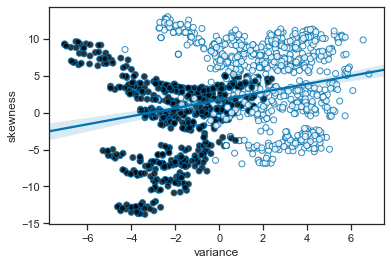

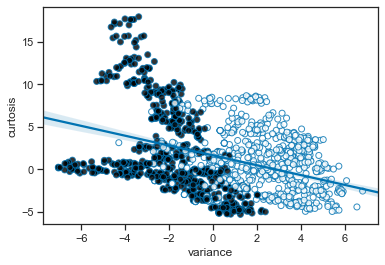

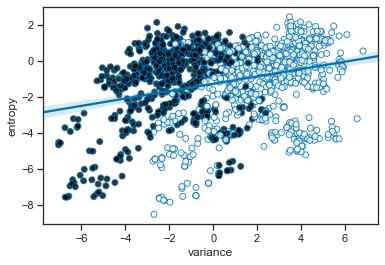

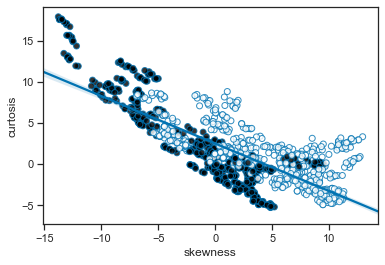

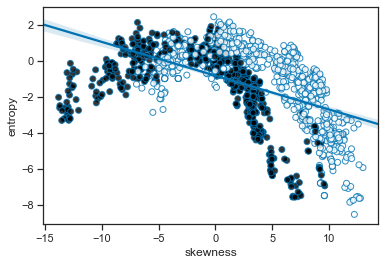

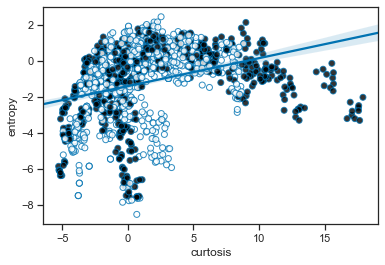

In [15]:
bank_notes["color"]= np.where(bank_notes["class"] == 1.0, "#000000", "#ffffff")
columns = ['variance', 'skewness', 'curtosis', 'entropy']
for i in range(len(columns)):
    for j in range(len(columns)):
        if i >= j:
            continue
        else:
            plt.figure()
            sns.regplot(x = columns[i], y= columns[j], data = bank_notes, scatter_kws={'facecolors': bank_notes["color"]})
            plt.show()

In [ ]:
clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


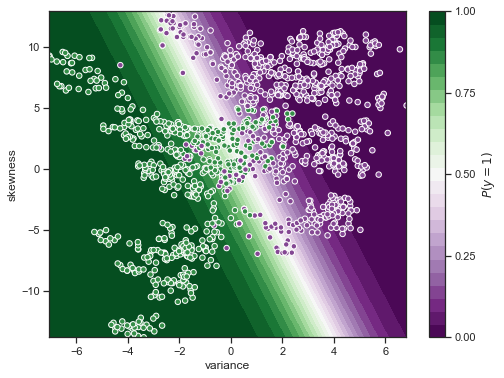

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


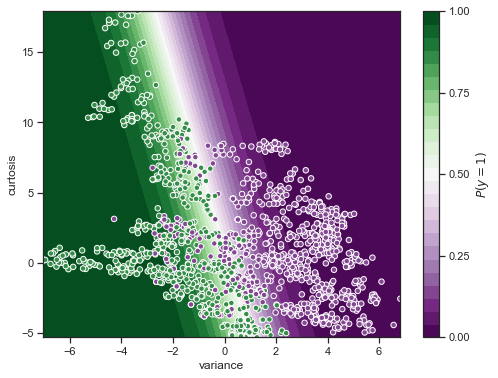

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


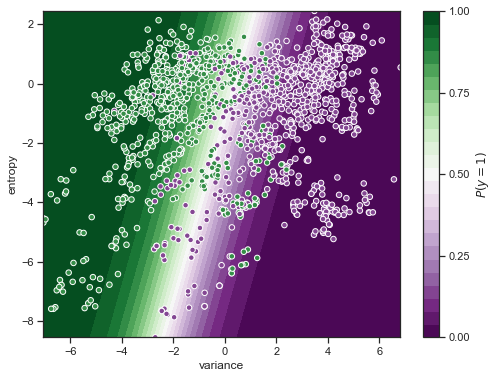

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


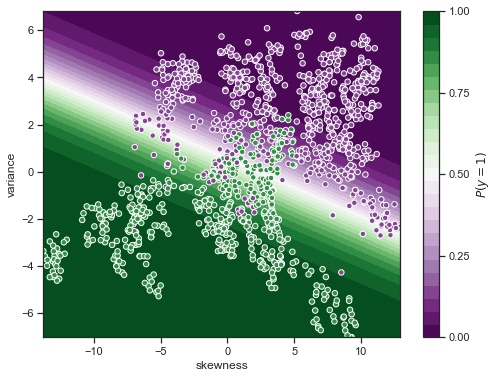

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


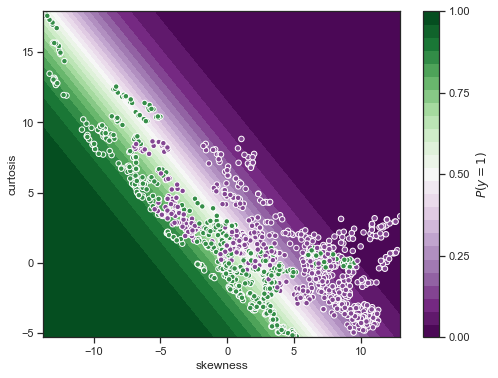

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


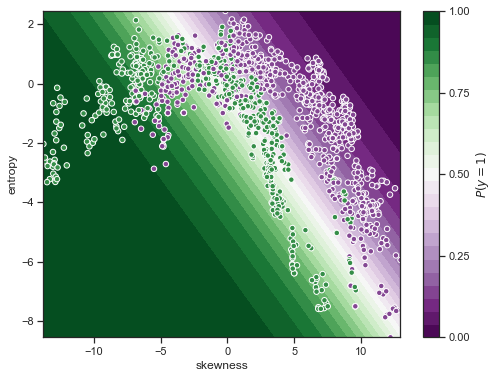

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


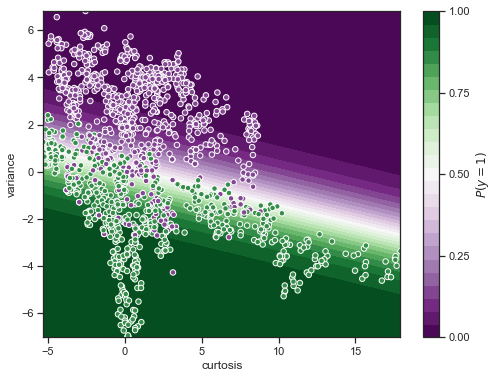

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


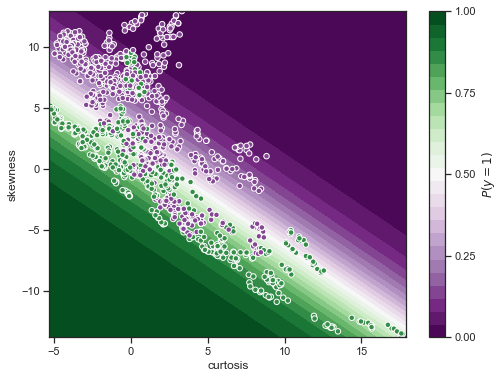

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


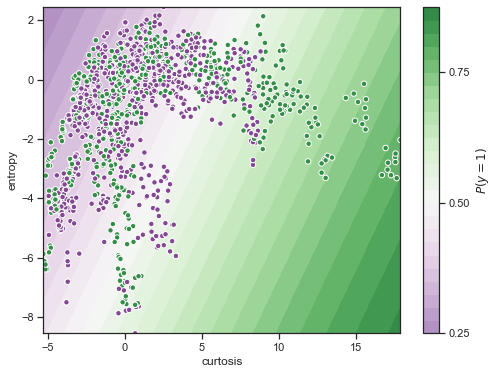

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


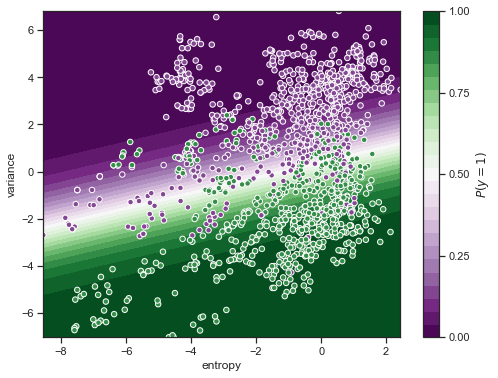

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


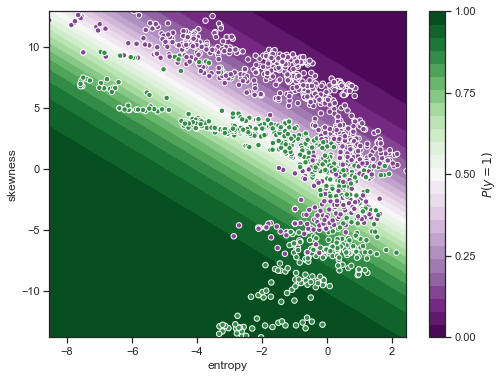

D:\Spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


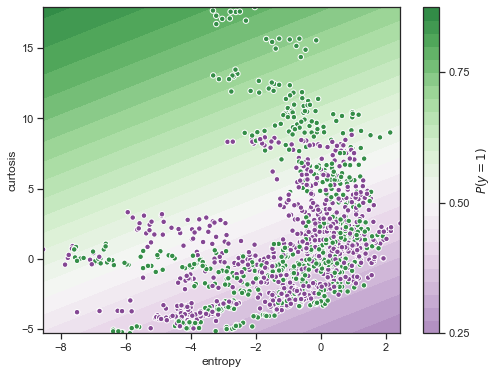

In [29]:
columns = ['variance', 'skewness', 'curtosis', 'entropy']
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            continue
        df = bank_notes.copy()
        target = "class"

        X, y = df[[col1, col2]], df[[target]].values.flatten()
        clf = LogisticRegression().fit(X, y)

        xx, yy = df[[col1]].values.flatten(), df[[col2]].values.flatten()
        xx, yy = np.mgrid[xx.min() : xx.max() : 0.01, yy.min() : yy.max() : 0.01]
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

        f, ax = plt.subplots(figsize=(8, 6))
        contour = ax.contourf(xx, yy, probs, 25, cmap="PRGn", vmin=0, vmax=1)
        ax_c = f.colorbar(contour)
        ax_c.set_label("$P(y = 1)$")
        ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

        ax.scatter(X[col1].values.flatten(), X[col2].values.flatten(), c=y, s=30, cmap="PRGn", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
        ax.set(xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xlabel=col1, ylabel=col2)

        plt.show()



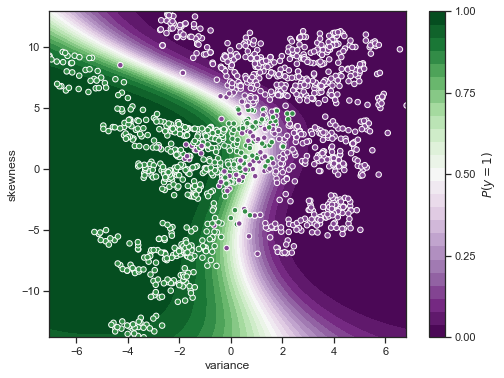

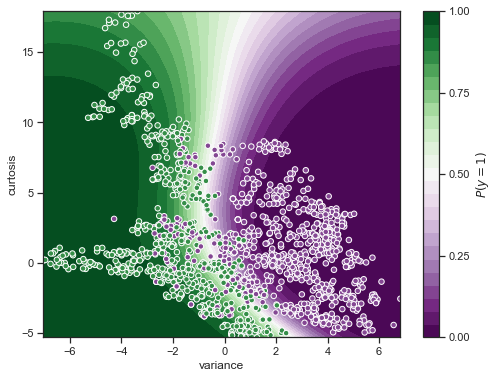

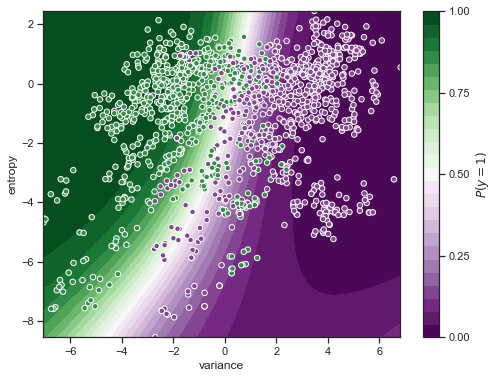

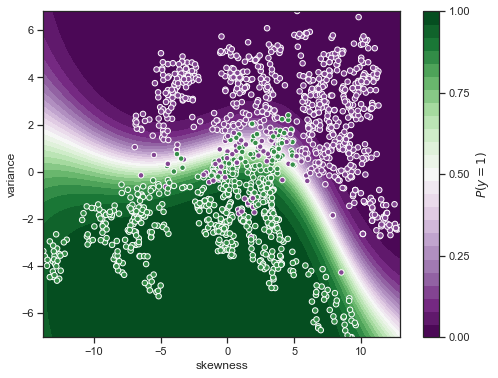

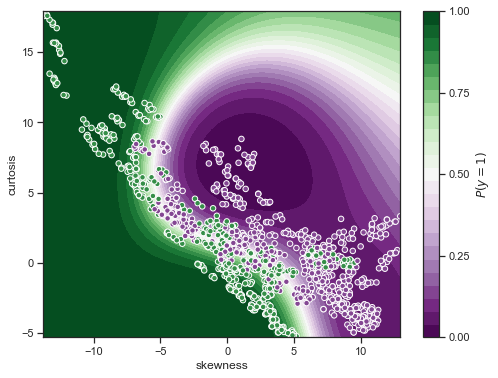

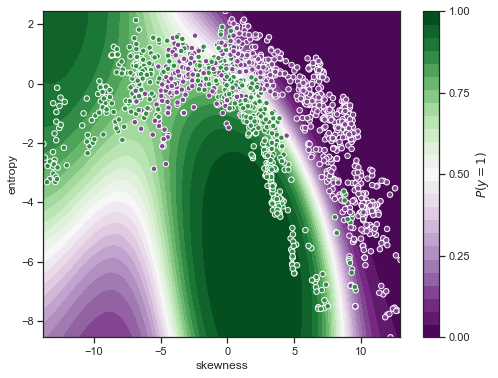

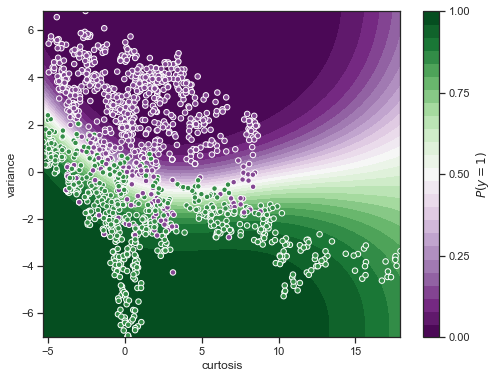

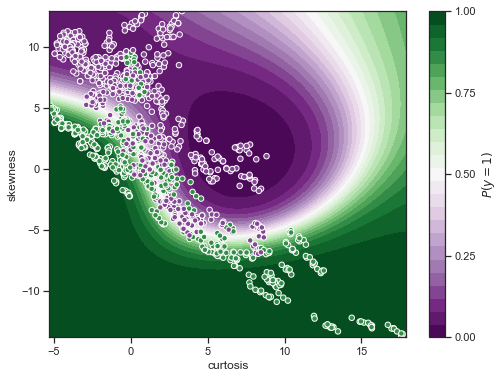

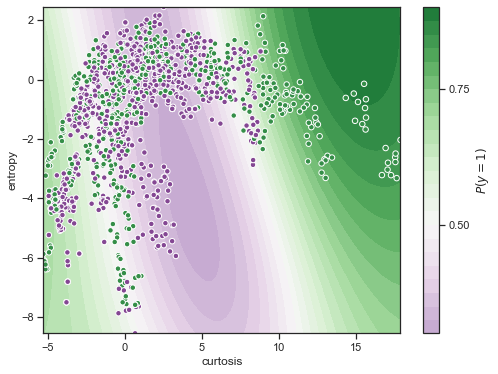

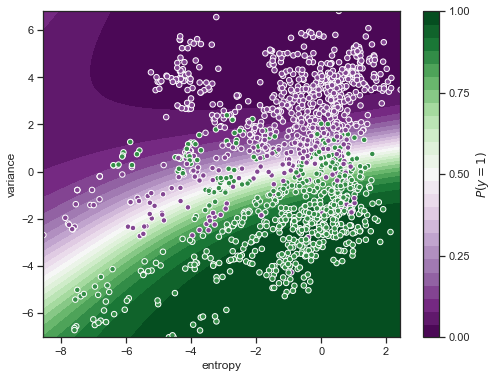

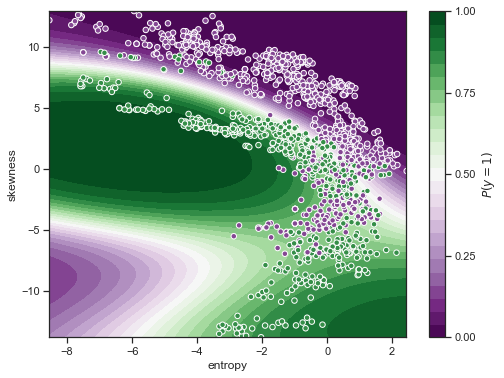

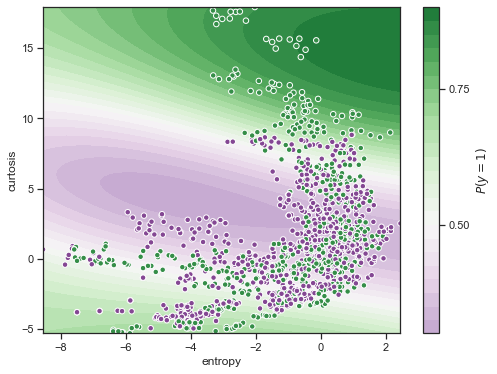

In [36]:
columns = ['variance', 'skewness', 'curtosis', 'entropy']
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            continue
        df = bank_notes.copy()
        target = "class"

        X, y = df[[col1, col2]], df[[target]].values.flatten()
        clf = SVC(kernel = 'rbf', random_state=0, gamma = 0.01, class_weight="balanced", probability = True).fit(X, y)

        xx, yy = df[[col1]].values.flatten(), df[[col2]].values.flatten()
        xx, yy = np.mgrid[xx.min() : xx.max() : 0.01, yy.min() : yy.max() : 0.01]
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

        f, ax = plt.subplots(figsize=(8, 6))
        contour = ax.contourf(xx, yy, probs, 25, cmap="PRGn", vmin=0, vmax=1)
        ax_c = f.colorbar(contour)
        ax_c.set_label("$P(y = 1)$")
        ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

        ax.scatter(X[col1].values.flatten(), X[col2].values.flatten(), c=y, s=30, cmap="PRGn", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
        ax.set(xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xlabel=col1, ylabel=col2)

        plt.show()



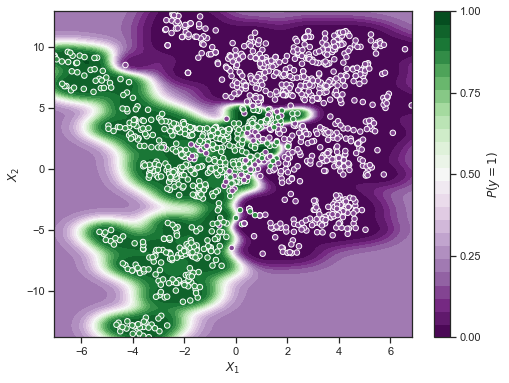

-13.7731 12.9469


In [39]:
df = bank_notes.copy()
col1 = "variance"
col2 = "skewness"
target = "class"

X, y = df[[col1, col2]], df[[target]].values.flatten()
# Run this with a high gamma and a low gamma to see the difference between variance and bias?
clf = SVC(kernel = 'rbf', random_state=0, gamma = 1, class_weight="balanced", probability = True).fit(X, y)

xx, yy = df[[col1]].values.flatten(), df[[col2]].values.flatten()
xx, yy = np.mgrid[xx.min() : xx.max() : 0.01, yy.min() : yy.max() : 0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="PRGn", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(X[col1].values.flatten(), X[col2].values.flatten(), c=y, s=30, cmap="PRGn", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xlabel="$X_1$", ylabel="$X_2$")

# Low gamma makes it so that you do'nt overfit
# High gamma makes it so that your data can, most likely, overfit
# Basically gamma = variance
#plt.savefig('low_gamma.png')
plt.savefig('high_gamma.png')
plt.show()

print(yy.min(), yy.max())